# Chelsey McMichael
###### Lab Final Activity

In [3]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
data=ascii.read("lab_final_data.txt")

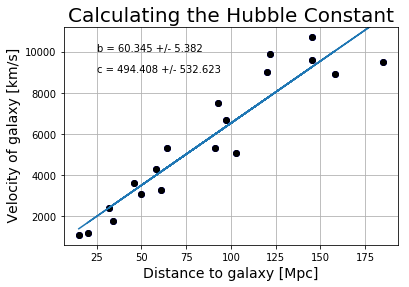

Hubble's Constant is 60.3454855101 km/s/Mpc.


In [17]:
distance=data['Dist']
velocity=data['Vel']

fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(distance, velocity, 'bo')
plt.axis('tight')
ax.grid(True)

plt.title('Calculating the Hubble Constant', fontsize=20)
plt.xlabel('Distance to galaxy [Mpc]', fontsize=14)
plt.ylabel(' Velocity of galaxy [km/s]', fontsize=14)

def func(x, b, c):
    return b*x + c

popt, pcov = curve_fit(func, distance, velocity)



ax.plot(distance, velocity,'ko')
ax.plot(distance, np.polyval(popt, distance), '-')
ax.text(25, 10000, r"b = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
ax.text(25, 9000, r"c = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))

plt.show()

print("Hubble's Constant is", popt[0],"km/s/Mpc.")

# Bonus: Estimating the Age of the Universe

From the relationship above, it is evident that:

\begin{equation}
{H_0}= \frac{\Delta{v}}{\Delta{d}}
\end{equation}

And the distance is in mega parsecs, which can be converted into kilometers:
\begin{equation}
= \frac{km/s}{km}
\end{equation}

Therefore:
\begin{equation}
{H_0}= \frac{1}{s}
\end{equation}

And:
\begin{equation}
{s}= \frac{1}{H_0}
\end{equation}

Now we can convert the units:

In [25]:
t = 1/(popt[0])
a_mpc = 3.0856776*10**19 #km

#but we must account for the fact that the universe has changed in size, therefore we must consider the density 
#R=(6piGp)^1/3*age^2/3
# substitute p=3H^2/8piG into the equation for R and you get
#R=(3(age))/2t)^2/3, where R=1

age = ((t)*(a_mpc))*2/3
print("The universe is:", age ,"seconds old")

The universe is: 3.40890189649e+17 seconds old
